In [21]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from pathlib import Path

In [22]:
dir_path = "/workspaces/gorillatracker/data/splits/ground_truth-cxl-face_images-kfold-openset-seed-42-trainval-80-test-20-k-5"

In [23]:
dirs = os.listdir(dir_path)

In [28]:
#create a dataframe for each directory
df: list[pd.DataFrame] = []

for i, d in enumerate(dirs):
    data = []
    solitary_data = 0
    # Extract data from filenames
    for filename in os.listdir(os.path.join(dir_path, d)):
        parts = filename.split('_')
        if len(parts) >= 4:
            id_, camid, date, id2 = parts[:4]
            solitary = False
            if(len(id_) != 4):  # if != 4, then the gorilla is a solitary one without a group
                # print(f"Solitary in {filename}")
                solitary_data += 1
                solitary = True
            Groupid = id_[:2] if not solitary else "SOLITARY"
            id_ = id_[2:] if not solitary else ''.join(filter(str.isdigit, id_))
            id2 = ''.join(filter(str.isdigit, id2)) # remove non-numeric characters
            date = dt.datetime.strptime(date, '%Y%m%d').date()
            data.append((Groupid, id_, camid, date, id2, f"{dir_path}/{d}/{filename}"))
        else:
            print(f"Invalid filename {filename}")
            
    # Create a DataFrame
    df.append(pd.DataFrame(data, columns=['GROUP', 'ID', 'CAM', 'DATE', 'ID2', 'FILENAME']))
    print(f"Directory {d} had {solitary_data} images of solitary gorillas with no group")

Directory fold-2 had 5 images of solitary gorillas with no group
Directory fold-3 had 5 images of solitary gorillas with no group
Directory fold-1 had 0 images of solitary gorillas with no group
Directory fold-0 had 50 images of solitary gorillas with no group
Directory fold-4 had 2 images of solitary gorillas with no group
Directory test had 0 images of solitary gorillas with no group


In [29]:
print(df[2]["FILENAME"][0])

/workspaces/gorillatracker/data/splits/ground_truth-cxl-face_images-kfold-openset-seed-42-trainval-80-test-20-k-5/fold-1/JZ01_R508_20210504_242dMumOfJZ41.png


In [30]:
for i, d in enumerate(dirs):
    print(f"{d}:")
    print(f"\t Images: {df[i].shape[0]}")
    print(f"\t Individuals: {df[i].groupby(['GROUP', 'ID']).ngroups}")
    print(f"\t Groups: {df[i]['GROUP'].nunique()}")
    print(f"\t Cameras: {df[i]['CAM'].nunique()}")
    print(f"\t Days: {df[i]['DATE'].nunique()}")
    print(f"\t DateRange: {df[i]['DATE'].min()} - {df[i]['DATE'].max()}")
    print(f"\t Video_clips: {df[i].groupby(['CAM', 'DATE', 'ID2']).ngroups}")
    print(f"\t Videos: {df[i].groupby(['CAM', 'DATE']).ngroups}")

fold-2:
	 Images: 351
	 Individuals: 34
	 Groups: 17
	 Cameras: 17
	 Days: 41
	 DateRange: 2018-12-02 - 2022-11-18
	 Video_clips: 135
	 Videos: 44
fold-3:
	 Images: 210
	 Individuals: 34
	 Groups: 16
	 Cameras: 15
	 Days: 40
	 DateRange: 2018-12-02 - 2022-10-17
	 Video_clips: 93
	 Videos: 43
fold-1:
	 Images: 276
	 Individuals: 31
	 Groups: 13
	 Cameras: 16
	 Days: 39
	 DateRange: 2018-12-14 - 2022-11-18
	 Video_clips: 114
	 Videos: 43
fold-0:
	 Images: 299
	 Individuals: 32
	 Groups: 15
	 Cameras: 16
	 Days: 34
	 DateRange: 2018-12-14 - 2022-10-17
	 Video_clips: 127
	 Videos: 34
fold-4:
	 Images: 207
	 Individuals: 31
	 Groups: 14
	 Cameras: 14
	 Days: 36
	 DateRange: 2019-03-14 - 2022-11-18
	 Video_clips: 118
	 Videos: 38
test:
	 Images: 188
	 Individuals: 41
	 Groups: 17
	 Cameras: 18
	 Days: 45
	 DateRange: 2018-10-03 - 2022-11-18
	 Video_clips: 98
	 Videos: 49


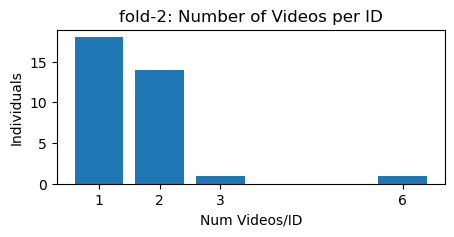

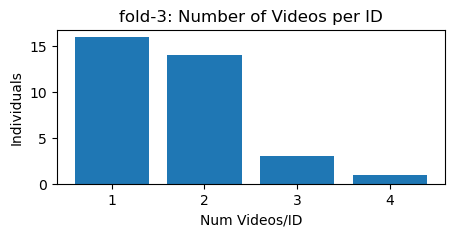

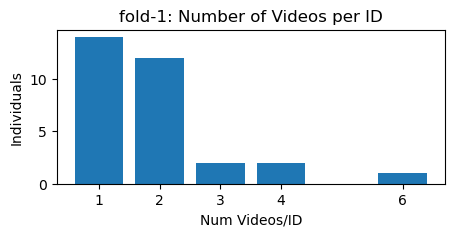

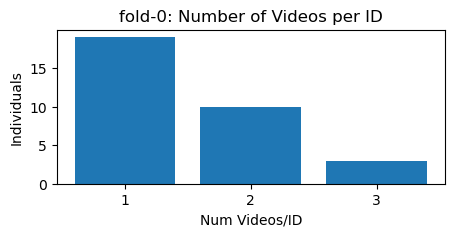

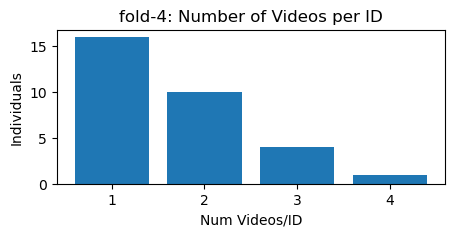

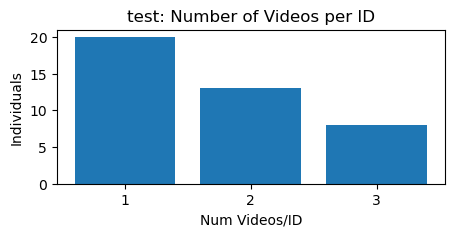

In [31]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=['GROUP', 'ID', 'CAM', 'DATE'])
    videos_per_id = unique_videos.groupby(['GROUP', 'ID']).size()
    videos_count_distribution = videos_per_id.value_counts().sort_index()
    plt.figure(figsize=(5, 2))
    plt.bar(videos_count_distribution.index, videos_count_distribution.values)
    plt.xlabel('Num Videos/ID')
    plt.ylabel('Individuals')
    plt.title(f'{d}: Number of Videos per ID')
    plt.xticks(videos_count_distribution.index)
    plt.show()
    


Combined:
	 Images: 1531
	 Individuals: 117
	 Groups: 23
	 Cameras: 24
	 Days: 90
	 DateRange: 2018-10-03 - 2022-11-18
	 Video_clips: 378
	 Videos: 102


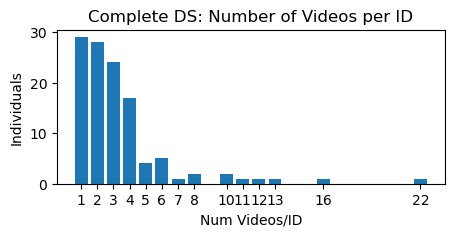

In [32]:
df_combined = pd.concat(df)
print(f"Combined:")
print(f"\t Images: {len(df_combined)}")
print(f"\t Individuals: {df_combined.groupby(['GROUP', 'ID']).ngroups}")
print(f"\t Groups: {df_combined['GROUP'].nunique()}")
print(f"\t Cameras: {df_combined['CAM'].nunique()}")
print(f"\t Days: {df_combined['DATE'].nunique()}")
print(f"\t DateRange: {df_combined['DATE'].min()} - {df_combined['DATE'].max()}")
print(f"\t Video_clips: {df_combined.groupby(['CAM', 'DATE', 'ID2']).ngroups}")
print(f"\t Videos: {df_combined.groupby(['CAM', 'DATE']).ngroups}")

unique_videos = df_combined.drop_duplicates(subset=['GROUP', 'ID', 'CAM', 'DATE', 'ID2'])
videos_per_id = unique_videos.groupby(['GROUP', 'ID']).size()
videos_count_distribution = videos_per_id.value_counts().sort_index()
plt.figure(figsize=(5, 2))
plt.bar(videos_count_distribution.index, videos_count_distribution.values)
plt.xlabel('Num Videos/ID')
plt.ylabel('Individuals')
plt.title(f'Complete DS: Number of Videos per ID')
plt.xticks(videos_count_distribution.index)
plt.show()

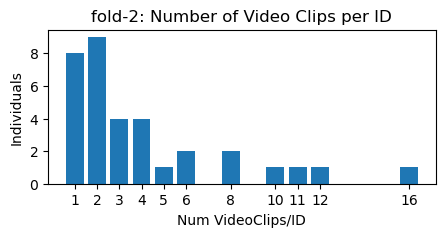

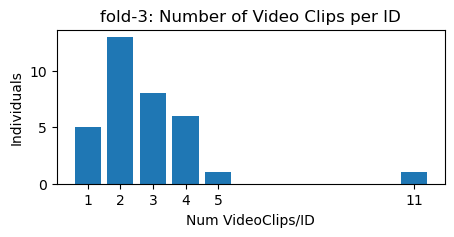

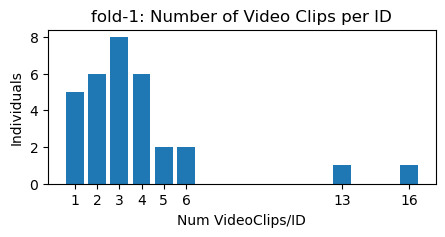

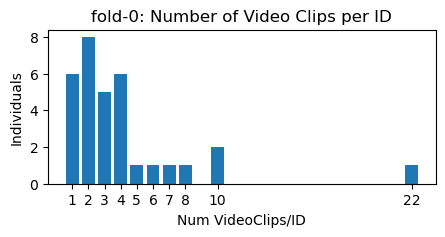

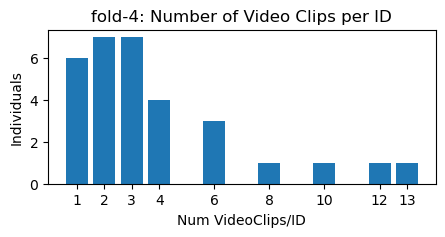

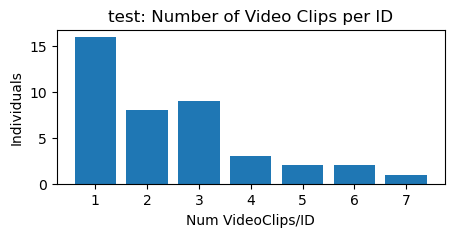

In [33]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=['GROUP', 'ID', 'CAM', 'DATE', 'ID2'])
    videos_per_id = unique_videos.groupby(['GROUP', 'ID']).size()
    videos_count_distribution = videos_per_id.value_counts().sort_index()
    plt.figure(figsize=(5, 2))
    plt.bar(videos_count_distribution.index, videos_count_distribution.values)
    plt.xlabel('Num VideoClips/ID')
    plt.ylabel('Individuals')
    plt.title(f'{d}: Number of Video Clips per ID')
    plt.xticks(videos_count_distribution.index)
    plt.show()

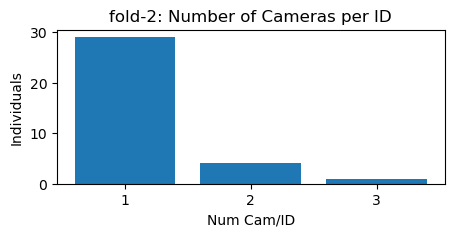

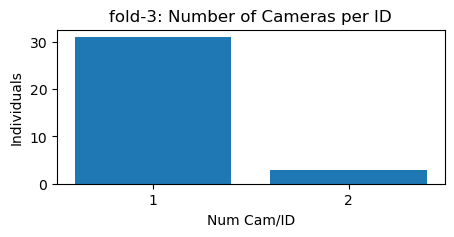

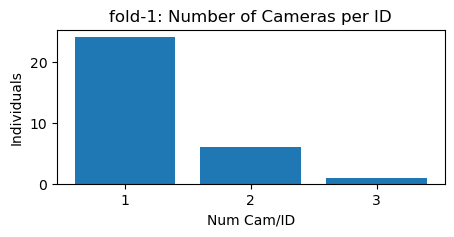

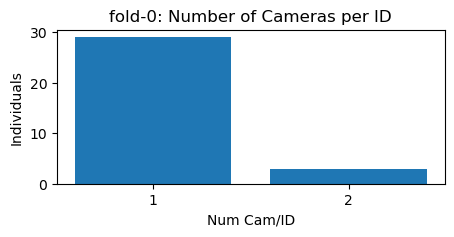

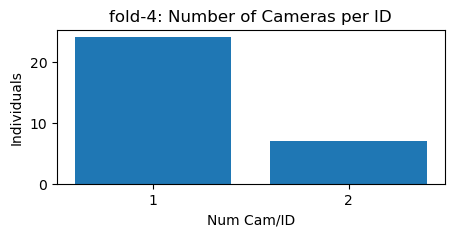

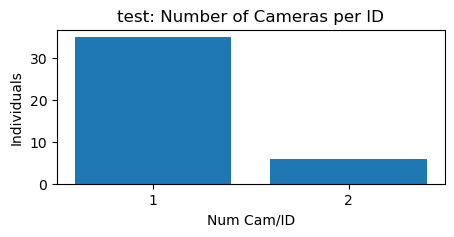

In [34]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=['GROUP', 'ID', 'CAM'])
    videos_per_id = unique_videos.groupby(['GROUP', 'ID']).size()
    videos_count_distribution = videos_per_id.value_counts().sort_index()
    plt.figure(figsize=(5, 2))
    plt.bar(videos_count_distribution.index, videos_count_distribution.values)
    plt.xlabel('Num Cam/ID')
    plt.ylabel('Individuals')
    plt.title(f'{d}: Number of Cameras per ID')
    plt.xticks(videos_count_distribution.index)
    plt.show()

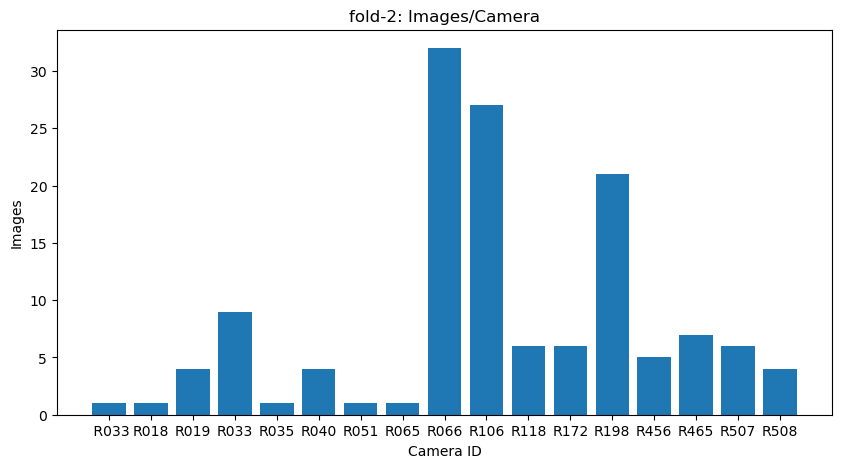

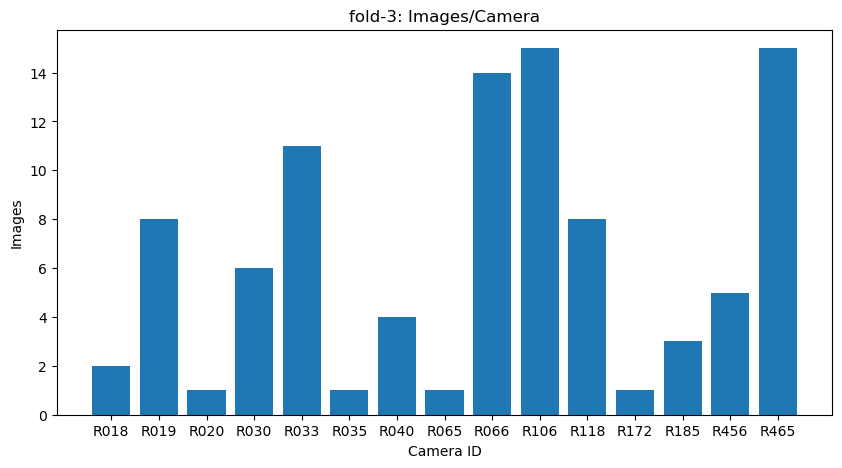

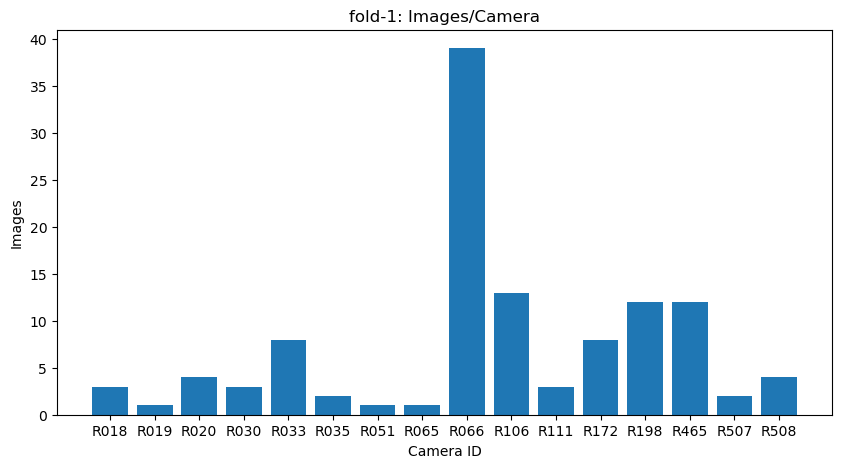

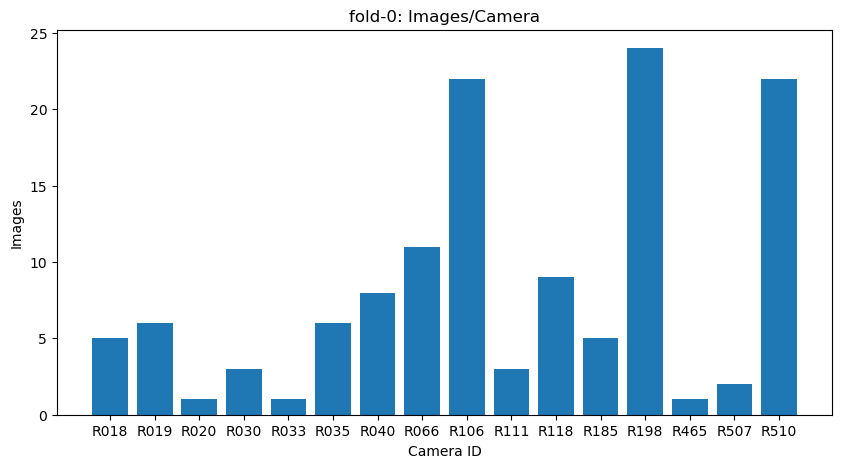

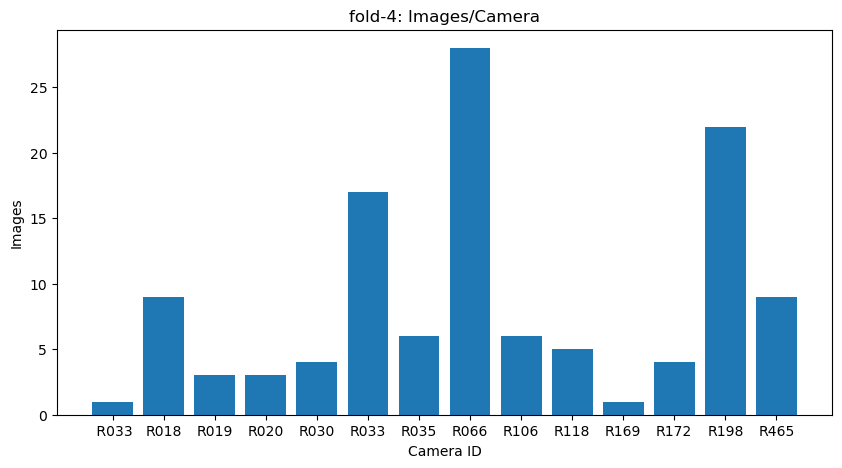

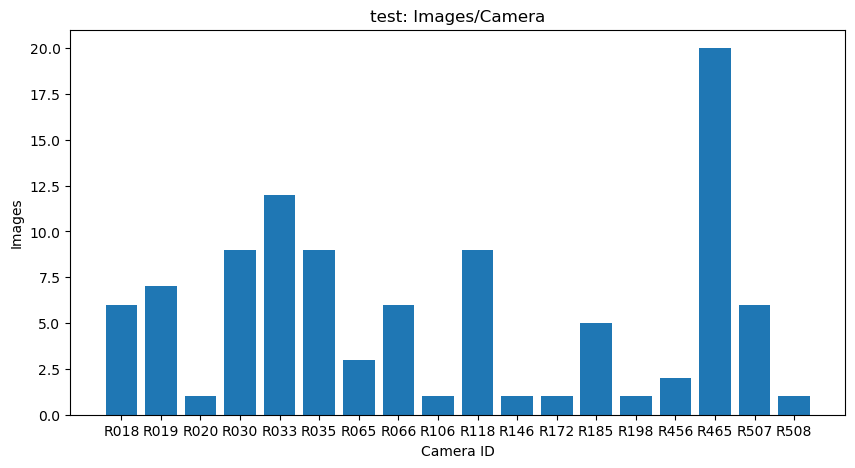

In [35]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=['GROUP', 'ID', 'CAM', 'DATE', 'ID2'])
    images_per_camera = unique_videos.groupby('CAM').size()
    plt.figure(figsize=(10, 5))
    plt.bar(images_per_camera.index, images_per_camera.values)
    plt.xlabel('Camera ID')
    plt.ylabel('Images')
    plt.title(f'{d}: Images/Camera')
    plt.show()

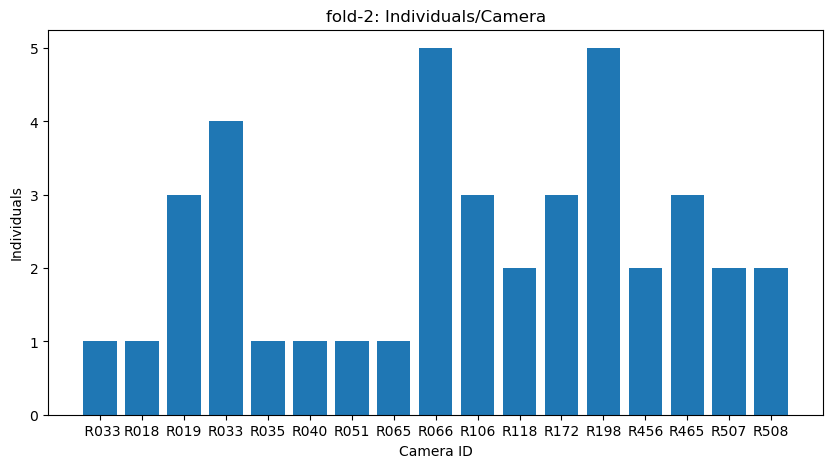

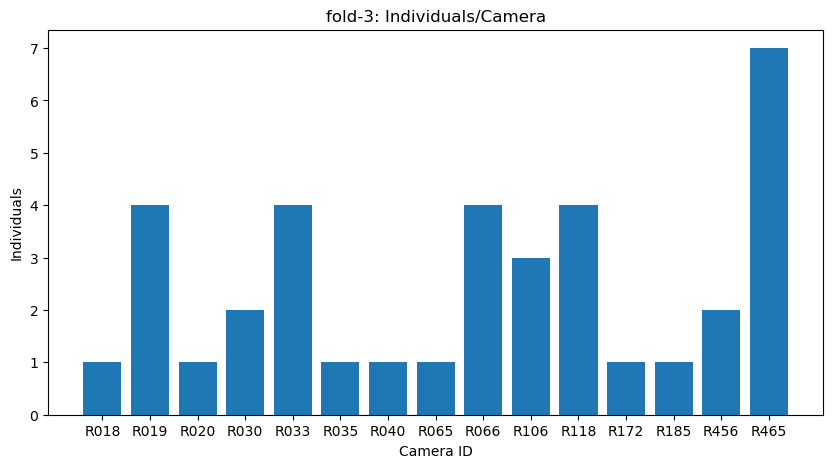

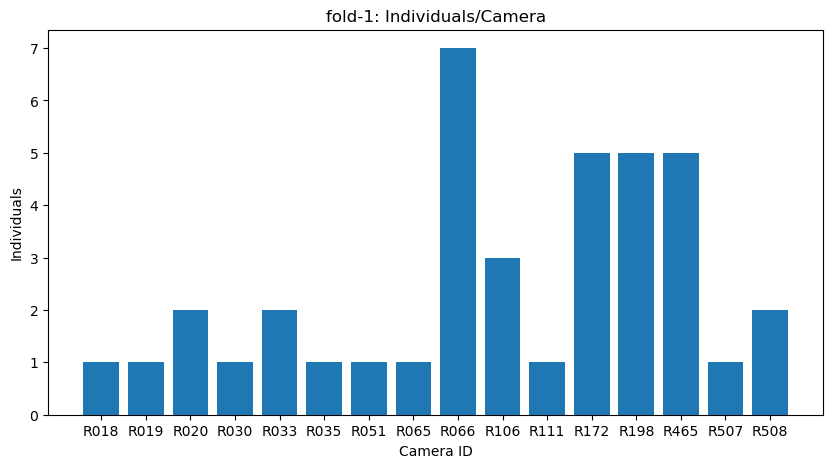

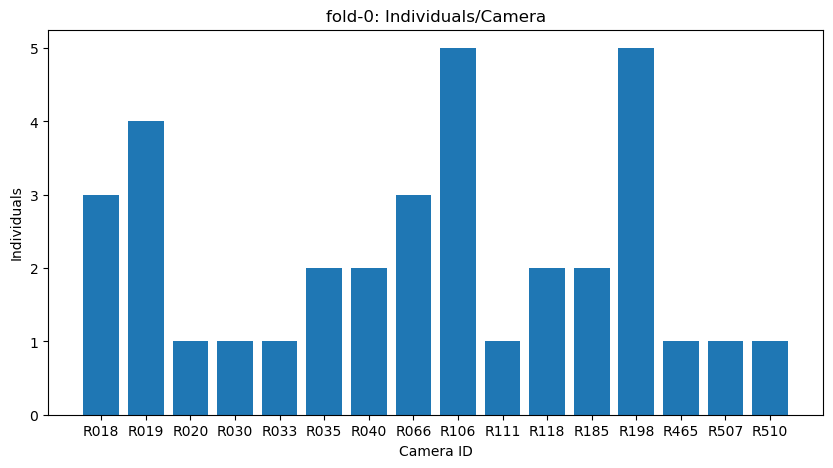

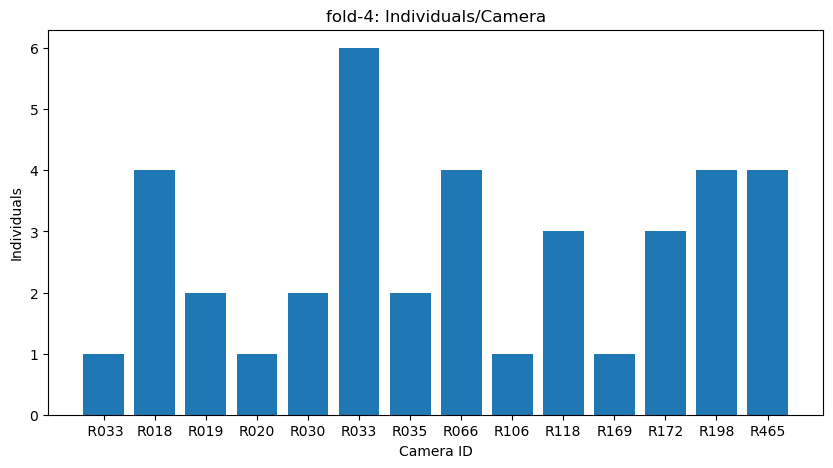

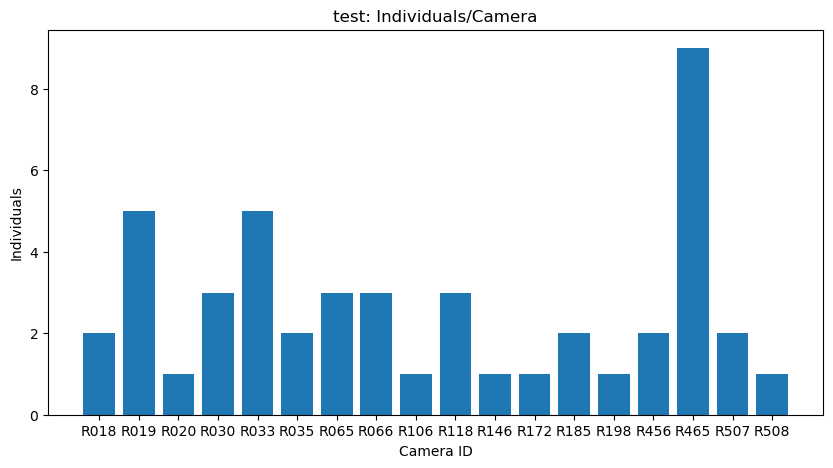

In [36]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=['GROUP', 'ID', 'CAM', 'DATE', 'ID2'])
    individuals_per_camera = unique_videos.groupby(['CAM', 'GROUP', 'ID']).size().reset_index().groupby('CAM').size()
    plt.figure(figsize=(10, 5))
    plt.bar(individuals_per_camera.index, individuals_per_camera.values)
    plt.xlabel('Camera ID')
    plt.ylabel('Individuals')
    plt.title(f'{d}: Individuals/Camera')
    plt.show()

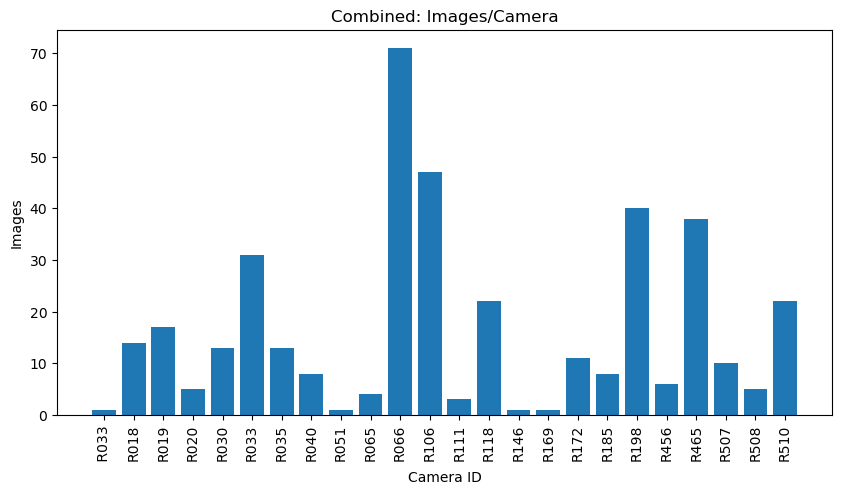

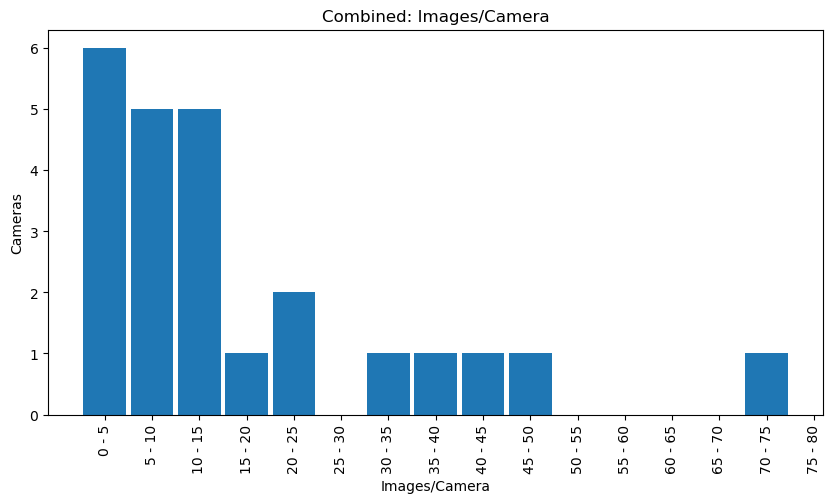

In [37]:
# combined
df_combined = pd.concat(df)
unique_videos = df_combined.drop_duplicates(subset=['GROUP', 'ID', 'CAM', 'DATE', 'ID2'])
images_per_camera = unique_videos.groupby('CAM').size()
plt.figure(figsize=(10, 5))
plt.bar(images_per_camera.index, images_per_camera.values)
plt.xlabel('Camera ID')
plt.ylabel('Images')
plt.title('Combined: Images/Camera')
plt.xticks(rotation=90)
plt.show()

# make this plot a histogram with bins of 10 images per camera and show the number of cameras in each bin
# center the bins
plt.figure(figsize=(10, 5))
plt.hist(images_per_camera, bins=range(0, 80, 5), align='left', rwidth=0.9)
plt.xticks(ticks=range(0, 80, 5), labels=[f'{i} - {i+5}' for i in range(0, 80, 5)], rotation=90)
plt.xlabel('Images/Camera')
plt.ylabel('Cameras')
plt.title('Combined: Images/Camera')
plt.show()

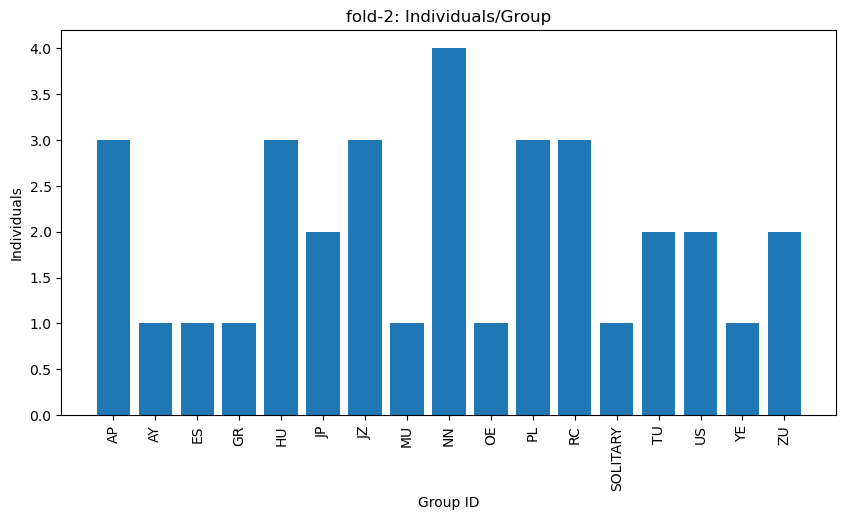

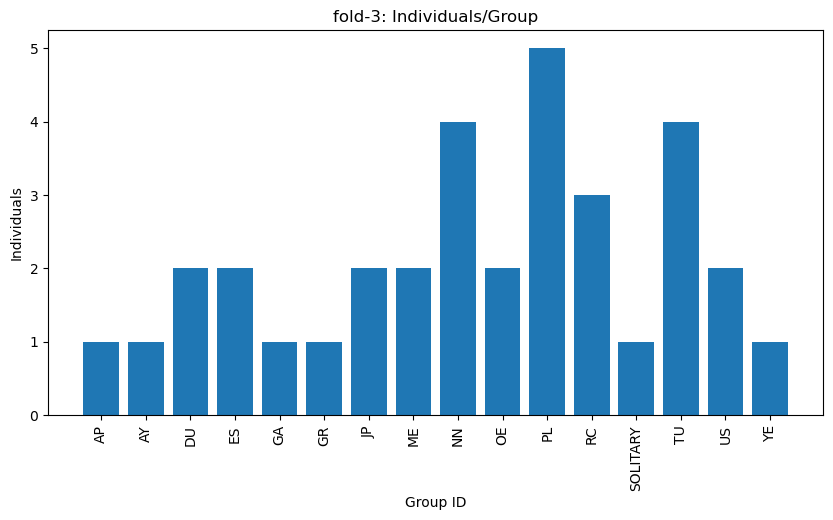

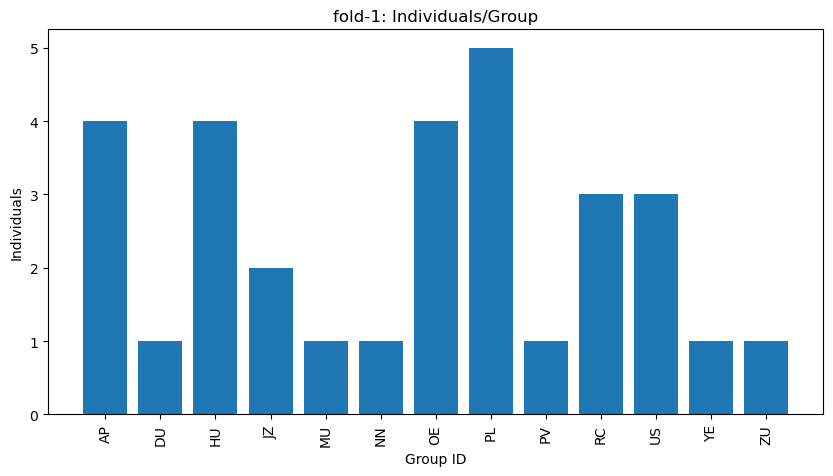

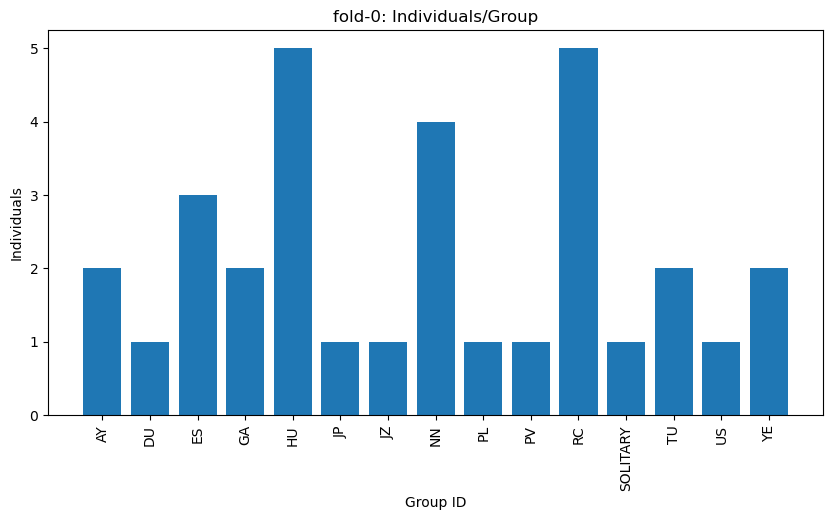

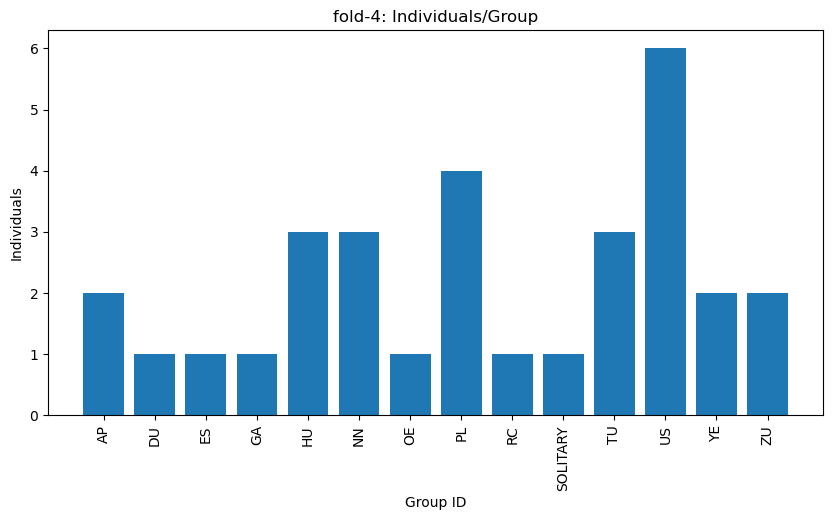

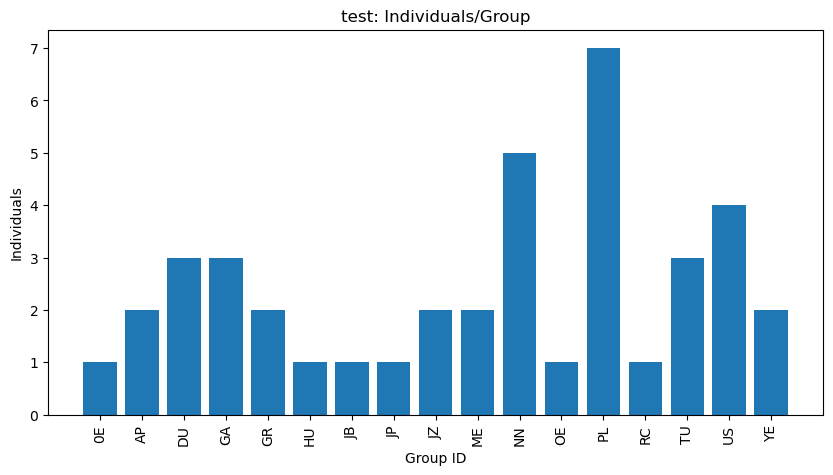

In [38]:
for i, d in enumerate(dirs):
    unique_videos = df[i].drop_duplicates(subset=['GROUP', 'ID', 'CAM', 'DATE', 'ID2'])
    unique_individuals_per_group = unique_videos.groupby(['GROUP', 'ID']).size().reset_index().groupby('GROUP').size()
    plt.figure(figsize=(10, 5))
    plt.bar(unique_individuals_per_group.index, unique_individuals_per_group.values)
    plt.xlabel('Group ID')
    plt.ylabel('Individuals')
    plt.title(f'{d}: Individuals/Group')
    plt.xticks(rotation=90)
    plt.show()

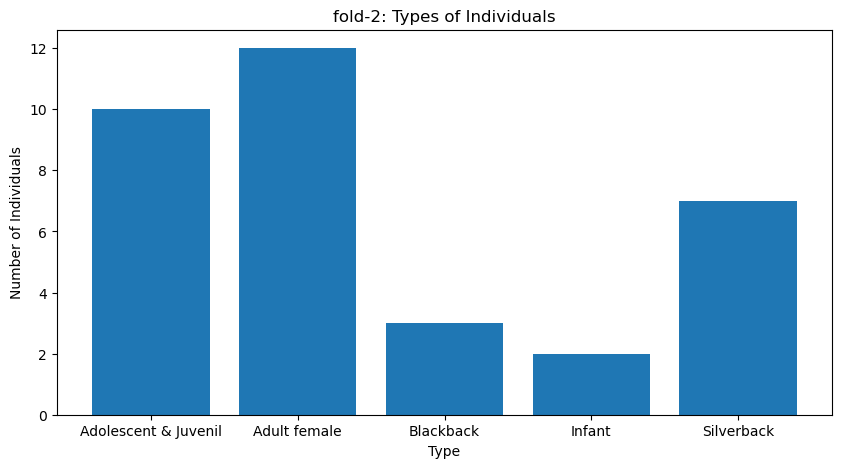

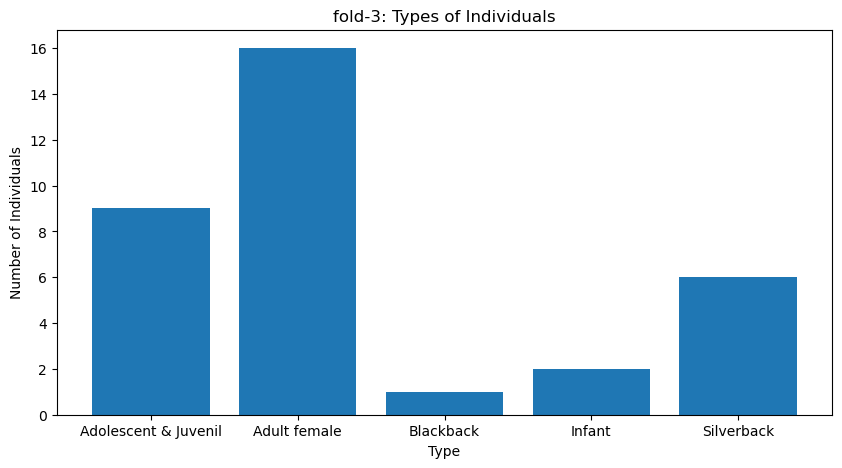

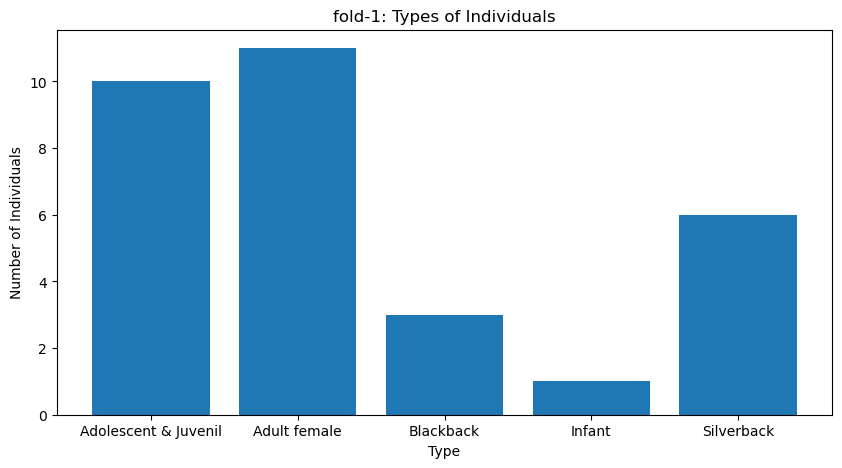

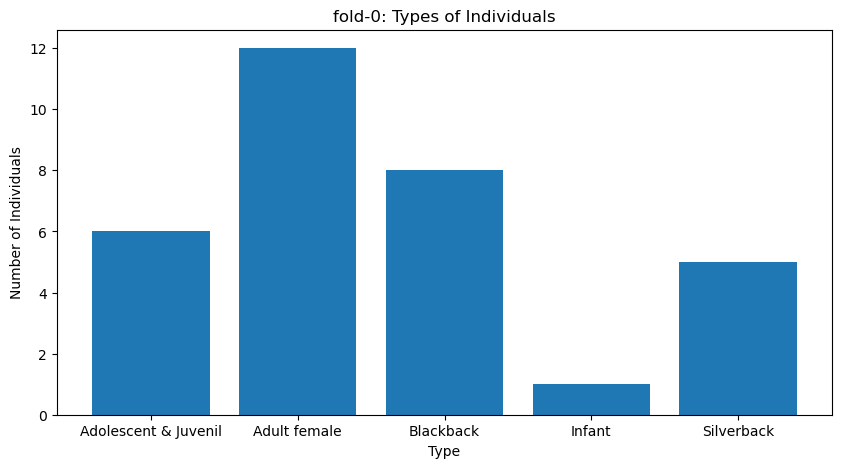

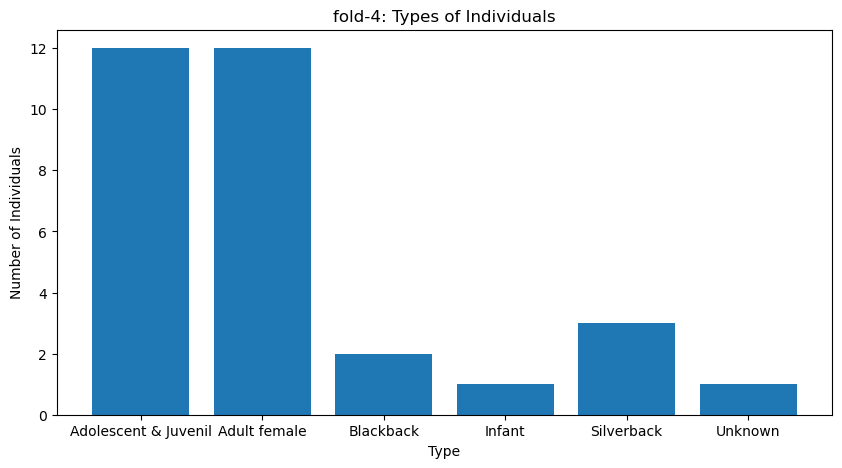

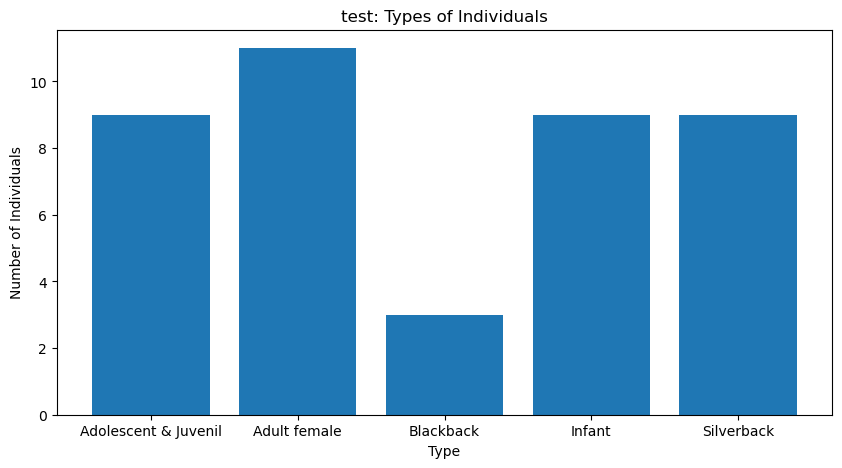

In [39]:
def categorize_id(id_):
    id_num = int(id_)
    if id_num == 0:
        return 'Silverback'
    elif 1 <= id_num <= 19:
        return 'Adult female'
    elif 20 <= id_num <= 39:
        return 'Blackback'
    elif 40 <= id_num <= 59:
        return 'Adolescent & Juvenil'
    elif 60 <= id_num <= 79:
        return 'Infant'
    else:
        return 'Unknown'

for i, d in enumerate(dirs):
    unique_individuals = df[i].drop_duplicates(subset=['GROUP', 'ID']).copy()
    # filter out non numeric IDs
    unique_individuals = unique_individuals[unique_individuals['ID'].str.isnumeric()]
    
    # Categorize each ID and add to the DataFrame using assign()
    unique_individuals = unique_individuals.assign(Type=unique_individuals['ID'].apply(categorize_id))
    
    # Calculate the number of each type
    type_distribution = unique_individuals['Type'].value_counts().sort_index()
    
    
    # Plot the distribution of types
    plt.figure(figsize=(10, 5))
    plt.bar(type_distribution.index, type_distribution.values)
    plt.xlabel('Type')
    plt.ylabel('Number of Individuals')
    plt.title(f'{d}: Types of Individuals')
    plt.show()

In [40]:
# plot the resolution of all combined images 

from PIL import Image

img_sizes = []
for row in df_combined.itertuples():
    img = Image.open(os.path.join(dir_path, row[6]))
    img_sizes.append(img.size)
        
len(img_sizes)

1531

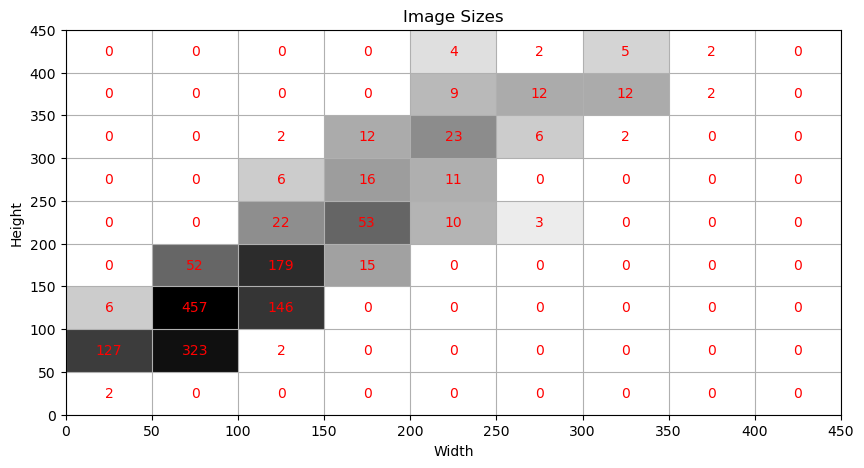

In [41]:
# make a matrix histogram of the image sizes (width x height)
from matplotlib.colors import Colormap, LogNorm
import numpy as np

plt.figure(figsize=(10, 5))
amounts_x, amounts_y = [x[0] for x in img_sizes], [x[1] for x in img_sizes]
norm = LogNorm()
plt.hist2d(amounts_x, amounts_y, bins=range(0, 500, 50), cmap="binary", norm=norm)
for i in range(0, 450, 50):
    for j in range(0, 450, 50):
        plt.text(i+25, j+25, f"{len([1 for x in img_sizes if i <= x[0] < i+50 and j <= x[1] < j+50])}", color='red', ha='center', va='center')
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Sizes')
# plt.colorbar()
plt.grid()
plt.show()

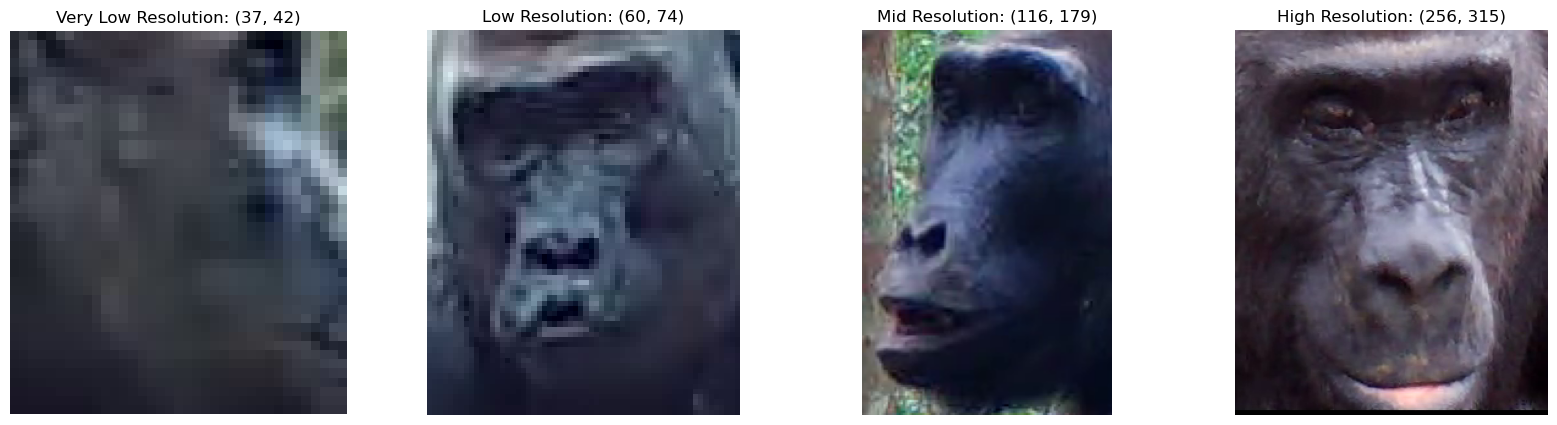

In [42]:
# plot one low mid and high resolution image
very_low_res = [x for x in img_sizes if x[0] < 50 and x[1] < 50][1]
low_res = [x for x in img_sizes if 50 <= x[0] < 100 and 50 <= x[1] < 100][0]
mid_res = [x for x in img_sizes if 100 <= x[0] < 200 and 100 <= x[1] < 200][0]
high_res = [x for x in img_sizes if x[0] > 200 and x[1] > 200][21]

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.imshow(Image.open(os.path.join(dir_path, df_combined.iloc[img_sizes.index(very_low_res)]['FILENAME'])))
plt.title(f"Very Low Resolution: {very_low_res}")
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(Image.open(os.path.join(dir_path, df_combined.iloc[img_sizes.index(low_res)]['FILENAME'])))
plt.title(f"Low Resolution: {low_res}")
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(Image.open(os.path.join(dir_path, df_combined.iloc[img_sizes.index(mid_res)]['FILENAME'])))
plt.title(f"Mid Resolution: {mid_res}")
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(Image.open(os.path.join(dir_path, df_combined.iloc[img_sizes.index(high_res)]['FILENAME'])))
plt.title(f"High Resolution: {high_res}")
plt.axis('off')
plt.show() 